Some events form in different astrophysical environments than others. **You want to figure out how many of formation channels are at play.**


The strategy here is to fit a Gaussian Mixture model: that is, my model is a sum of $N$ gaussians each with mean $\mu_j$ and standard deviation $\sigma_j$ and weight $\alpha_j$:

$p(x_i|\theta) = \sum_{j=1}^N \alpha_j \mathcal{N}(\mu_j,\sigma_j) $

This depends on $3N-1$ parameters (not $3N$ because the sum of the $\alpha_j$ must be unity to ensure that this is a probability.

#### Tasks

1) Load this file (`np.load`) and complete a quick exploration of the data. How many modes do you think you see?

2) Take some time to explore `sklearn.mixture.GaussianMixture`. Check the documentation, some examples, the help menu, etc. You first need to define the model (instance of a class), and then train it on the data using the `fit` method (the data provided are already in the right numpy format!). This will output the trained model, which has various attributes.

*Note*. We'll do a more formal introduction to scikit-learn in one of the next lectures. This is meant to be a formative example on how you might find yourself dealing with a library you've never seen before. This happens *all the time* in scientific research!

3) Complete the fit 10 times with $N=1,...,10$ Gaussians. 

Note: `sklearn` by default will use the so-called [Expectation-Maximization algorithm](https://en.wikipedia.org/wiki/Expectation%E2%80%93maximization_algorithm), which is one of the many great things in data science we don't have time to study in detail.

4) For each of this fits, compute the AIC (easy! It's a attribute of the trained model!). Plot $N$ vs AIC: which model is preferred? The AIC needs to be minimised

5) Plot the preferred solution on top of the input data. You should get a very nice fit!

6) Understand (i.e. plot) which Gaussian mode corresponds to which part of the input dataset. 

*Hint:* Useful methods here are `score_samples` and `predict_proba`: you'll need them both. Try to understand what they do and how you can put them together.




Text(0.5, 0, '$M_c$ [$M_\\odot$]')

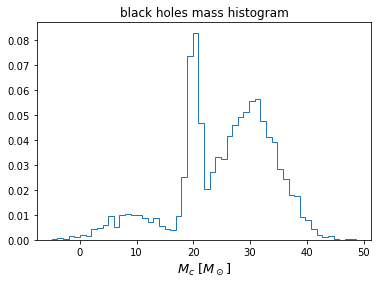

In [3]:
import numpy as np
import matplotlib.pyplot as plt

#loading the data from the file: it is an array with shape (N, 1)
data = np.load('formationchannels.npy')
plt.hist(data, int(np.sqrt(len(data))), histtype = 'step', density = True)
plt.title('black holes mass histogram')
plt.xlabel('$M_c$ [$M_\odot$]', fontsize = 13)

[Text(0.5, 0, '# components'),
 Text(0, 0.5, 'AIC'),
 Text(0.5, 1.0, 'Akaike information criterion')]

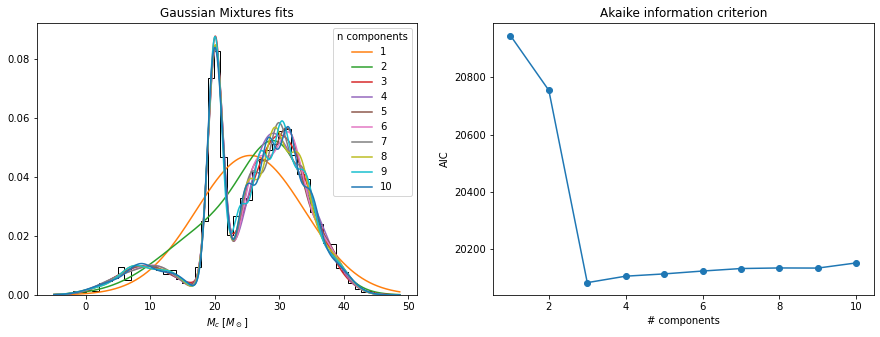

In [43]:
from sklearn import mixture 
from scipy.stats import norm

#number of tries
N = 10

#fitting N = 1, ..., 10 gaussians on our data
model = [mixture.GaussianMixture(n_components=i).fit(data) for i in range(1, N+1, 1)] 
AIC = [model[i].aic(data) for i in range(N)]



fig= plt.figure(figsize = (15, 5))

ax = fig.add_subplot(121)
x = np.linspace(data.min(), data.max(), 1000)
ax.hist(data, int(np.sqrt(len(data))), histtype = 'step', density = True, edgecolor = 'black')
for m in model:
    logpdf = m.score_samples(x.reshape(-1, 1)) #reshaping x to make it a (N, 1) array
    pdf = np.exp(logpdf)
    ax.plot(x, pdf)
    
ax.set(xlabel = '$M_c$ [$M_\odot$]', title = 'Gaussian Mixtures fits')    
ax.legend(range(1, N+1), title = 'n components')

ax = fig.add_subplot(122)
ax.plot(range(1, N+1, 1), AIC, '-o')
ax.set(xlabel='# components', ylabel = 'AIC', title = 'Akaike information criterion')

Text(0.5, 1.0, '$M_c$ histogram vs GM fit (N = 3)')

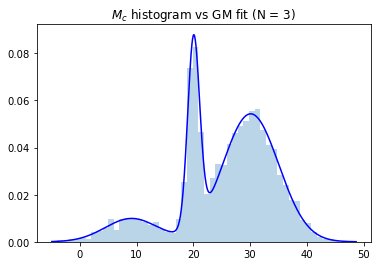

In [62]:
index_min = np.argmin(AIC) #index at which AIC is minimised -> best fit
best_logpdf = model[index_min].score_samples(x.reshape(-1, 1))
best_pdf = np.exp(best_logpdf)

plt.hist(data, int(np.sqrt(len(data))), density = True, alpha = 0.3)
plt.plot(x, best_pdf, '-b')
plt.title('$M_c$ histogram vs GM fit (N = ' + str(index_min+1) + ')')

Text(0.5, 1.0, 'GM components')

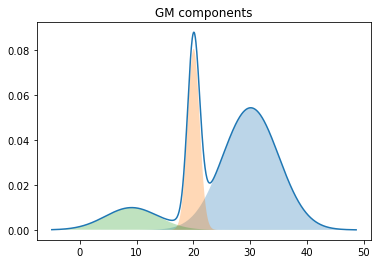

In [69]:
resp = model[index_min].predict_proba(x.reshape(-1, 1)) #predicting the responsabilities of each component
best_pdfi = resp * best_pdf[:, np.newaxis]

plt.plot(x, best_pdf)
plt.fill(x, best_pdfi, alpha = 0.3)
plt.title('GM components')